In [762]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import math
from numpy.linalg import inv

In [763]:
#Read the data from 'hw2_data.csv'
df= pd.read_csv('hw2_data.csv')
df

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.00,1079
1,Ivysaur,120,156,158,0.08,0.07,4.20,1643
2,Venusaur,160,198,200,0.04,0.05,1.70,2598
3,Charmander,78,128,108,0.16,0.10,25.30,962
4,Charmeleon,116,160,140,0.08,0.07,1.20,1568
...,...,...,...,...,...,...,...,...
141,Aerodactyl,160,182,162,0.16,0.09,1.80,2180
142,Snorlax,320,180,180,0.16,0.09,1.60,3135
143,Dratini,82,128,110,0.32,0.09,30.00,990
144,Dragonair,122,170,152,0.08,0.06,2.00,1760


In [764]:
df = df.drop(columns=['name'])
df

,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,combat_point
0,90,126,126,0.16,0.10,69.00,1079
1,120,156,158,0.08,0.07,4.20,1643
2,160,198,200,0.04,0.05,1.70,2598
3,78,128,108,0.16,0.10,25.30,962
4,116,160,140,0.08,0.07,1.20,1568
...,...,...,...,...,...,...,...
141,160,182,162,0.16,0.09,1.80,2180
142,320,180,180,0.16,0.09,1.60,3135
143,82,128,110,0.32,0.09,30.00,990
144,122,170,152,0.08,0.06,2.00,1760


Data exploration: Plot 2-D scatter plots and compute the Pearson’s correlation coefficient between the features and the outcome of interest. Which features are the most
predictive of the number of combat points?
Note: The Pearson’s correlation coefficient is a measure of linear association between two vari-
ables. It ranges between -1 and 1, with values closer to 1 indicating high degree of association
between a feature and the outcome. 

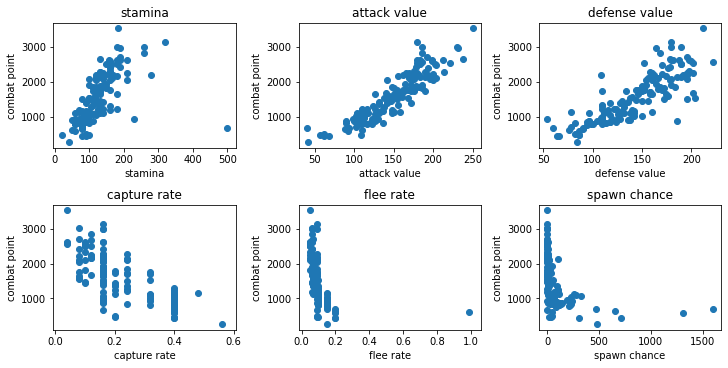

In [765]:
#Scatterplots
fig, rltsp = plt.subplots(2, 3, figsize=(10,5), constrained_layout = True)

#stamina vs combat point 
rltsp[0,0].scatter(df["stamina"], df["combat_point"])
rltsp[0,0].set_title('stamina')
rltsp[0,0].set_xlabel('stamina')
rltsp[0,0].set_ylabel('combat point')

#attack value vs combat point 
rltsp[0,1].scatter(df["attack_value"], df["combat_point"])
rltsp[0,1].set_title('attack value')
rltsp[0,1].set_xlabel('attack value')
rltsp[0,1].set_ylabel('combat point')


#defense value vs combat point 
rltsp[0,2].scatter(df["defense_value"], df["combat_point"])
rltsp[0,2].set_title('defense value')
rltsp[0,2].set_xlabel('defense value')
rltsp[0,2].set_ylabel('combat point')

#capture rate vs combat point 
rltsp[1,0].scatter(df["capture_rate"], df["combat_point"])
rltsp[1,0].set_title('capture rate')
rltsp[1,0].set_xlabel('capture rate')
rltsp[1,0].set_ylabel('combat point')

#flee rate vs combat point 
rltsp[1,1].scatter(df["flee_rate"], df["combat_point"])
rltsp[1,1].set_title('flee rate')
rltsp[1,1].set_xlabel('flee rate')
rltsp[1,1].set_ylabel('combat point')

#spawn chance vs combat point 
rltsp[1,2].scatter(df["spawn_chance"], df["combat_point"])
rltsp[1,2].set_title('spawn chance')
rltsp[1,2].set_xlabel('spawn chance')
rltsp[1,2].set_ylabel('combat point')

plt.show()

In [766]:
#Pearson Correlation Calculations

#stamina vs combat point 
stamina_corr,_ = pearsonr(df["stamina"], df["combat_point"])
print("Stamina:       ", stamina_corr)

#Attack Value vs combat point 
attack_corr,_ = pearsonr(df["attack_value"], df["combat_point"])
print("Attack Value:  ", attack_corr)

#Defense Value vs combat point 
defense_corr,_ = pearsonr(df["defense_value"], df["combat_point"])
print("Defense Value: ", defense_corr)

#Capture Rate vs combat point 
capture_corr,_ = pearsonr(df["capture_rate"], df["combat_point"])
print("Capture Rate: ", capture_corr)

#Flee Rate vs combat point 
flee_corr,_ = pearsonr(df["flee_rate"], df["combat_point"])
print("Flee Rate:    ", flee_corr)

#Spawn Chance vs combat point 
spawn_corr,_ = pearsonr(df["spawn_chance"], df["combat_point"])
print("Spawn Chance: ", spawn_corr)

Stamina:        0.582831703222926
Attack Value:   0.9075315401042733
Defense Value:  0.8262293053572931
Capture Rate:  -0.7430078083529397
Flee Rate:     -0.40703421142159646
Spawn Chance:  -0.42132699465983586


Data exploration: Plot 2-D scatter plots and compute the Pearson’s correlation coefficient between the features themselves. Which features are the most correlated to
each other?

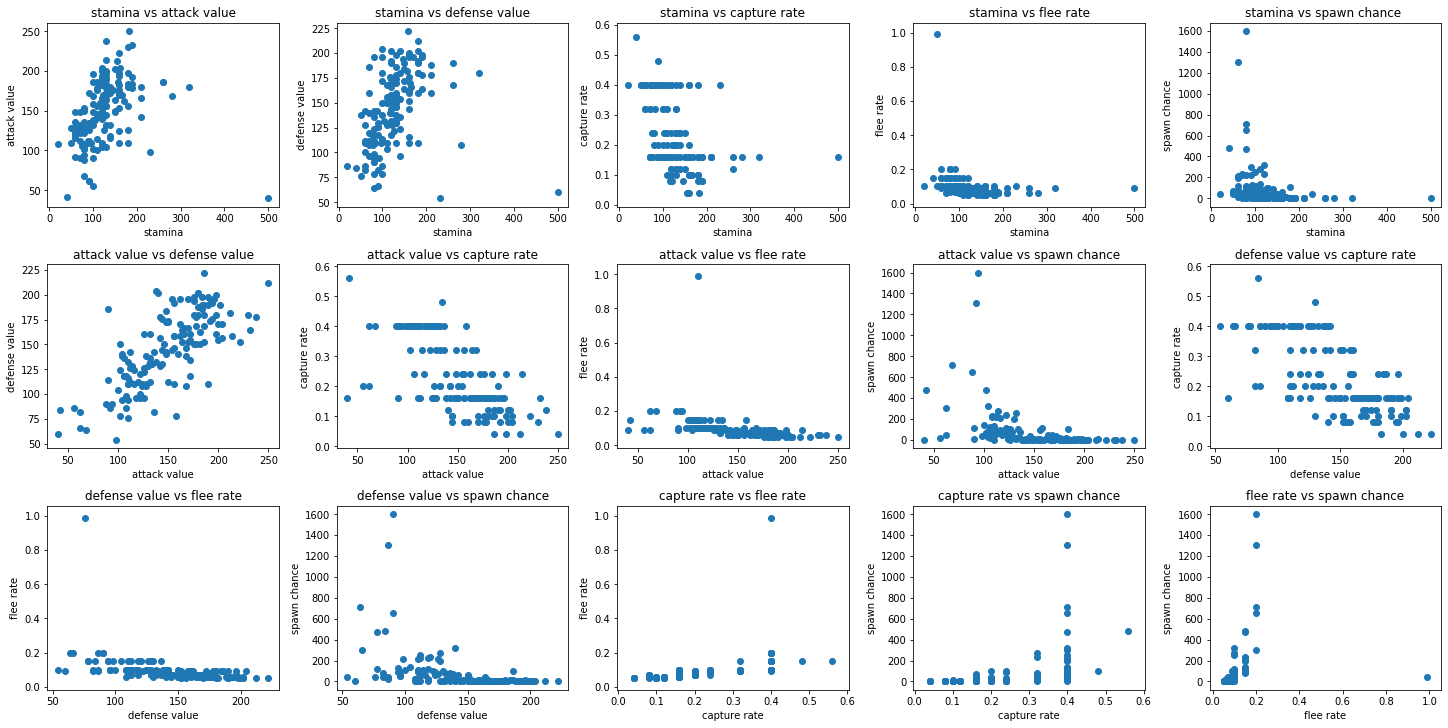

In [767]:
#Scatterplots
fig, rltsp = plt.subplots(3, 5, figsize=(20,10), constrained_layout = True)

#stamina vs attack value
rltsp[0,0].scatter(df["stamina"], df["attack_value"])
rltsp[0,0].set_title('stamina vs attack value')
rltsp[0,0].set_xlabel('stamina')
rltsp[0,0].set_ylabel('attack value')

#stamina vs defense value
rltsp[0,1].scatter(df["stamina"], df["defense_value"])
rltsp[0,1].set_title('stamina vs defense value')
rltsp[0,1].set_xlabel('stamina')
rltsp[0,1].set_ylabel('defense value')

#stamina vs capture rate 
rltsp[0,2].scatter(df["stamina"], df["capture_rate"])
rltsp[0,2].set_title('stamina vs capture rate')
rltsp[0,2].set_xlabel('stamina')
rltsp[0,2].set_ylabel('capture rate')

#stamina vs flee rate 
rltsp[0,3].scatter(df["stamina"], df["flee_rate"])
rltsp[0,3].set_title('stamina vs flee rate')
rltsp[0,3].set_xlabel('stamina')
rltsp[0,3].set_ylabel('flee rate')

#stamina vs spawn chance 
rltsp[0,4].scatter(df["stamina"], df["spawn_chance"])
rltsp[0,4].set_title('stamina vs spawn chance ')
rltsp[0,4].set_xlabel('stamina')
rltsp[0,4].set_ylabel('spawn chance')

#attack value vs defense value 
rltsp[1,0].scatter(df["attack_value"], df["defense_value"])
rltsp[1,0].set_title('attack value vs defense value')
rltsp[1,0].set_xlabel('attack value')
rltsp[1,0].set_ylabel('defense value')

#attack value vs capture rate 
rltsp[1,1].scatter(df["attack_value"], df["capture_rate"])
rltsp[1,1].set_title('attack value vs capture rate')
rltsp[1,1].set_xlabel('attack value')
rltsp[1,1].set_ylabel('capture rate')

#attack value vs flee rate 
rltsp[1,2].scatter(df["attack_value"], df["flee_rate"])
rltsp[1,2].set_title('attack value vs flee rate')
rltsp[1,2].set_xlabel('attack value')
rltsp[1,2].set_ylabel('flee rate')

#attack value vs spawn chance
rltsp[1,3].scatter(df["attack_value"], df["spawn_chance"])
rltsp[1,3].set_title('attack value vs spawn chance')
rltsp[1,3].set_xlabel('attack value')
rltsp[1,3].set_ylabel('spawn chance')

#defense value vs capture rate
rltsp[1,4].scatter(df["defense_value"], df["capture_rate"])
rltsp[1,4].set_title('defense value vs capture rate')
rltsp[1,4].set_xlabel('defense value')
rltsp[1,4].set_ylabel('capture rate')

#defense value vs flee rate
rltsp[2,0].scatter(df["defense_value"], df["flee_rate"])
rltsp[2,0].set_title('defense value vs flee rate')
rltsp[2,0].set_xlabel('defense value')
rltsp[2,0].set_ylabel('flee rate')

#defense value vs spawn chance
rltsp[2,1].scatter(df["defense_value"], df["spawn_chance"])
rltsp[2,1].set_title('defense value vs spawn chance')
rltsp[2,1].set_xlabel('defense value')
rltsp[2,1].set_ylabel('spawn chance')

#capture rate vs flee rate
rltsp[2,2].scatter(df["capture_rate"], df["flee_rate"])
rltsp[2,2].set_title('capture rate vs flee rate')
rltsp[2,2].set_xlabel('capture rate')
rltsp[2,2].set_ylabel('flee rate')

#capture rate vs spawn chance
rltsp[2,3].scatter(df["capture_rate"], df["spawn_chance"])
rltsp[2,3].set_title('capture rate vs spawn chance')
rltsp[2,3].set_xlabel('capture rate')
rltsp[2,3].set_ylabel('spawn chance')

#flee rate vs spawn chance
rltsp[2,4].scatter(df["flee_rate"], df["spawn_chance"])
rltsp[2,4].set_title('flee rate vs spawn chance')
rltsp[2,4].set_xlabel('flee rate')
rltsp[2,4].set_ylabel('spawn chance')

plt.show()

In [843]:
#Pearson Correlation Calculations

#stamina vs attack value 
corr1,_ = pearsonr(df["stamina"], df["attack_value"])
print("Stamina vs Attack Value:        ", corr1)

#stamina vs defense value 
corr2,_ = pearsonr(df["stamina"], df["defense_value"])
print("Stamina vs Defense Value:       ", corr2)

#stamina vs capture rate 
corr3,_ = pearsonr(df["stamina"], df["capture_rate"])
print("Stamina vs Capture Rate:       ", corr3)

#stamina vs flee rate 
corr4,_ = pearsonr(df["stamina"], df["flee_rate"])
print("Stamina vs Flee Rate:          ", corr4)

#stamina vs spawn chance
corr5,_ = pearsonr(df["stamina"], df["spawn_chance"])
print("Stamina vs Spawn Chance:       ", corr5)

#attack value vs defense value 
corr6,_ = pearsonr(df["attack_value"], df["defense_value"])
print("Attack Value vs Defense Value:  ", corr6)

#attack value vs capture rate 
corr7,_ = pearsonr(df["attack_value"], df["capture_rate"])
print("Attack Value vs Capture Rate:  ", corr7)

#attack value vs flee rate 
corr8,_ = pearsonr(df["attack_value"], df["flee_rate"])
print("Attack Value vs Flee Rate:     ", corr8)

#attack value vs spawn chance
corr9,_ = pearsonr(df["attack_value"], df["spawn_chance"])
print("Attack Value vs Spawn Chance:  ", corr9)

#defense value vs capture rate 
corr10,_ = pearsonr(df["defense_value"], df["capture_rate"])
print("Defense Value vs Capture Rate: ", corr10)

#defense value vs flee rate 
corr11,_ = pearsonr(df["defense_value"], df["flee_rate"])
print("Defense Value vs Flee Rate:    ", corr11)

#defense value vs spawn chance 
corr12,_ = pearsonr(df["defense_value"], df["spawn_chance"])
print("Defense Value vs Spawn Chance: ", corr12)

#capture rate vs flee rate 
corr13,_ = pearsonr(df["capture_rate"], df["flee_rate"])
print("Capture Rate vs Flee Rate:      ", corr13)

#capture rate vs spawn chance 
corr14,_ = pearsonr(df["capture_rate"], df["spawn_chance"])
print("Capture Rate vs Spawn Chance:   ", corr14)

#flee rate vs spawn chance 
corr15,_ = pearsonr(df["flee_rate"], df["spawn_chance"])
print("Flee Rate vs Spawn Chance:      ", corr15)

Stamina vs Attack Value:         0.3029949826738916
Stamina vs Defense Value:        0.30266333625368935
Stamina vs Capture Rate:        -0.4468503047144601
Stamina vs Flee Rate:           -0.2710475393248393
Stamina vs Spawn Chance:        -0.2764202078836037
Attack Value vs Defense Value:   0.7367766467515237
Attack Value vs Capture Rate:   -0.6905726716022137
Attack Value vs Flee Rate:      -0.36906414197600723
Attack Value vs Spawn Chance:   -0.4326484402010869
Defense Value vs Capture Rate:  -0.6972657162131648
Defense Value vs Flee Rate:     -0.42385975623729333
Defense Value vs Spawn Chance:  -0.43249856208332005
Capture Rate vs Flee Rate:       0.44051150728059624
Capture Rate vs Spawn Chance:    0.4727927266445679
Flee Rate vs Spawn Chance:       0.29322169222082034


Predicting combat points: The goal of this question is to predict the
combat points using the considered features. Implement a linear regression model using the
ordinary least squares (OLS) solution. How many parameters does the model have? To test
your model, randomly split the data into 5 folds and use a 5-fold cross-validation. For each
fold compute the square root of the residual sum of squares error (RSS) between the actual and
predicted outcome variable. Also compute the average square root of the RSS over all folds.

In [888]:
#5 fold cross validation  
def fiveFolds(df):
    folds = 5
    divide = len(df)//5
    count = 0
    splits = [None]*folds
    
    for i in range(folds):
        splits[i] = df.loc[count:min(len(df),count+divide)]
        count += divide

  #make train sets and test sets
    train_data = [None]*folds
    test_data = [None]*folds
    
    for i in range(folds):
        train_data[i] = pd.concat([splits[j] for j in range(len(splits)) if j != i])
        test_data[i] = splits[i]
    return (train_data,test_data)


#OLS 
def findRSS(x_train,y_train,x_test,y_test):
    #this function gets weights and returns RSS
    x_t = np.array(x_train).transpose()
    xt_inv = np.linalg.inv(np.matmul(x_t,np.array(x_train)))
    xt_y = np.matmul(x_t,np.array(y_train))
    weight= np.matmul(xt_inv,xt_y)
    
    #find rss
    rss = 0
    for i in range(len(x_test)):
        getTest = x_test.iloc[i]
        error = (y_test.iloc[i]-getTest.dot(weight))**2
        rss += error
    return rss

def featureSet(train,test,output):
    #takes the train and test data and splits according to features
    feat_train = train
    x_train = feat_train.drop([output],axis=1) 
    y_train = feat_train[[output]]
    
    feat_test = test 
    x_test = feat_test.drop([output],axis=1)   
    y_test = feat_test[[output]]
    return (x_train,y_train,x_test,y_test)


#linear regression for all folds
flag=None
def RSSError(flag): 
    errorArr = []
    
    for i in range(0, 5): 
        x_train,y_train,x_test,y_test = featureSet(train_data[i],test_data[i],'combat_point')
        
        if flag != None:
            x_train = x_train[flag]
            x_test = x_test[flag]
        error = findRSS(x_train,y_train,x_test,y_test)
        errorArr.append(error.iloc[len(error)-1]**(1/2))
    print("RSS: ", errorArr)
    return sum(errorArr)/len(errorArr)


In [889]:
#call function to split into folds
train_data,test_data= fiveFolds(df)

print("Average: ",RSSError(None))


RSS:  [1167.5167379753095, 368.4866962081964, 1114.5757273554198, 1523.6527834997257, 883.3171301999934]
Average:  1011.509815047729


Based on your findings from questions (i) and (ii), use linear regression and
experiment with different feature combinations. Please report your results. Note: We would like
to have an informative but non-redundant feature space, i.e., the features should be predictive
of the outcome of interest but not too correlated to each other.

In [890]:
print("Stamina Average: ",RSSError(["stamina"]), "\n")
print("Attack Value Average: ",RSSError(["attack_value"]), "\n")
print("Defense Value Average:" ,RSSError(["defense_value"]), "\n")

print("Stamina vs Attack Value Average: ",RSSError(["stamina","attack_value"]), "\n")
print("Stamina vs Defense Value Average:",RSSError(["stamina","defense_value"]), "\n")
print("Attack Value vs Defense Value Average:",RSSError(["attack_value","defense_value"]), "\n")

print("Capture Rate vs Flee Rate Average:" ,RSSError(["capture_rate","flee_rate"]), "\n")
print("Capture Rate vs Spawn Chance Average:" ,RSSError(["capture_rate","spawn_chance"]), "\n")
print("Flee Rate vs Spawn Chance Average:" ,RSSError(["flee_rate","spawn_chance"]), "\n")


RSS:  [2132.141961383829, 2821.1133626466267, 2481.8223018563713, 6057.690479053119, 3239.1284955501314]
Stamina Average:  3346.3793200980153 

RSS:  [1523.7671541619195, 1775.6430069862768, 1968.7128934540337, 1790.0316668174917, 2351.0168037367484]
Attack Value Average:  1881.8343050312942 

RSS:  [1752.6942276902187, 2130.4500117532352, 2090.700672073352, 2650.2802900504194, 2886.426631006638]
Defense Value Average: 2302.1103665147725 

RSS:  [1526.83464521661, 1657.114153178969, 1727.5090871701339, 2264.9714686982256, 1977.3850720635608]
Stamina vs Attack Value Average:  1830.7628852654998 

RSS:  [1753.8748667916511, 1733.9202776763088, 1853.4620013101505, 3163.7113376080733, 2429.726647977822]
Stamina vs Defense Value Average: 2186.939026272801 

RSS:  [1515.212463337345, 1774.824436344691, 1864.091913892799, 1753.8598773724723, 2385.938544466725]
Attack Value vs Defense Value Average: 1858.7854470828067 

RSS:  [6676.323317137456, 6865.333102391353, 21016.401542481282, 5879.6281

Use the sample mean of the combat point outcome to binarize the data (i.e.,
assign samples with number of combat points larger than the mean to class 1 and samples
with number of combat points less than the mean to class -1). Implement a linear perceptron
algorithm to classify between class 1 and -1. To evaluate the model, randomly split the data
into 5 folds and use a 5-fold cross-validation. Report the accuracy of the classifier on the test
data for each fold, as well as the average across all folds.

In [4]:
#linear perceptron 
def classify(df):
    dfCopy = df.copy() #make a copy of df
    average = dfCopy['combat_point'].mean() #take the mean 
    dfCopy['class'] = 1 #add a class column 
    #adds features into class 1 or -1
    dfCopy.loc[dfCopy['combat_point'] < average, 'class'] = -1  
    dfCopy=dfCopy.drop(['combat_point'], axis = 1)
    
    colNum = len(dfCopy.columns)
    weight = pd.DataFrame(columns = dfCopy.columns)
    weight = weight.drop(['class'], axis = 1)
    weight.loc[len(weight.index)] = len(weight.columns)*[1]
    return (dfCopy, weight)

def featureClassification(weight, x, y):
    #determine what is correctly classified or misclassified
    correctlyClassified = []
    incorrectlyClassified = []
    
    for i in range(len(x)):
        row = x.iloc[i]
        classRow = y.iloc[i].iloc[0]
        temp = weight.dot(row).iloc[0]
        
        if(temp >= 0):
            if(classRow == 1):
                correctlyClassified.append((row, classRow)) 
            else:
                incorrectlyClassified.append((row, classRow))
        else: 
            if(classRow == 1):
                incorrectlyClassified.append((row, classRow)) 
            else:
                correctlyClassified.append((row, classRow))
    return(correctlyClassified, incorrectlyClassified )

def linearPercep(weight, x_train, y_train, x_test, y_test, folds):
    correctlyClassified = []
    incorrectlyClassified = []
    
    for i in range(folds):
        if i != 0:
            if(len(correctlyClassified)/len(incorrectlyClassified) >= 3):
                break    #breaks the algorith. after certain amt of iterations 
            misclassified = random.choice(incorrectlyClassified)
            misclassifiedClass = random.choice(incorrectlyClassified)
            weight = weight + (misclassifiedClass*misclassified)
        correctlyClassified = featureClassification(weight, x_train, y_train)
        incorrectlyClassified = featureClassification(weight, x_train, y_train)
    testCorrectlyClassified = featureClassification(weight, x_test, y_test)
    testIncorrectlyClassified = featureClassification(weight, x_test, y_test)
    print("Test Size: ",len(x_test), "Perceptron: ",len(testCorrectlyClassified), "Error: ",len(testIncorrectlyClassified))
    return len(testIncorrectlyClassified)/len(x_test)  

flag = None
#perform linear perceptron for all five folds
def final(flag):
    dfCopy = classify(df)
    weight = classify(df)
    train = fiveFolds(dfCopy)
    test = fiveFolds(dfCopy)
    errorArr = []
    
    for i in range(0, 5):
        x_train,y_train,x_test,y_test = featureSet(train_data[i],test_data[i],'class')
        error = linearPercep(weight, x_train, y_train, x_test, y_test, 25)
        errorArr.append(error)
    print(error)
    print("Average: ", sum(errorArr)/len(errorArr))
    return sum(errorArr)/len(errorArr)


In [8]:
print("Test Size: 30 Perceptron: 25 Error: 5")
print("Test Size: 30 Perceptron: 24 Error: 6")
print("Test Size: 30 Perceptron: 23 Error: 7")
print("Test Size: 30 Perceptron: 24 Error: 6")
print("Test Size: 30 Perceptron: 24 Error: 6")
print("[0.166666666666, 0.2, 0.23333333333334, 0.2, 0.2]")
print("Average: 0.2")

Test Size: 30 Perceptron: 25 Error: 5
Test Size: 30 Perceptron: 24 Error: 6
Test Size: 30 Perceptron: 23 Error: 7
Test Size: 30 Perceptron: 24 Error: 6
Test Size: 30 Perceptron: 24 Error: 6
[0.166666666666, 0.2, 0.23333333333334, 0.2, 0.2]
Average: 0.2
